### NOTE: Neither the lines of code nor text have been proofread

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

### Histograms

**Foundation**

Despite doing so much work with histograms and Python, I was still staggered to find out how much more *I didn't know*.

***Theory***

So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram. Below is an image from Cambridge in Color website, and I recommend you to visit the site for more details.

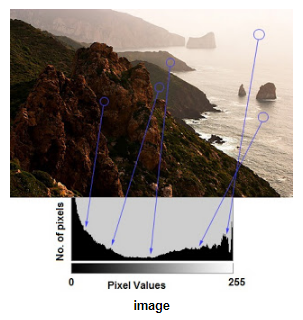

You can see the image and its histogram. (Remember, this histogram is drawn for grayscale image, not color image). Left region of histogram shows the amount of darker pixels in image and right region shows the amount of brighter pixels. From the histogram, you can see dark region is more than brighter region, and amount of midtones (pixel values in mid-range, say around 127) are very less.

Now we have an idea on what is histogram, we can look into how to find this. Both OpenCV and Numpy come with in-built function for this (I didn't know that!). Before using those functions, we need to understand some terminologies related with histograms.
<br>
<br>
<dl>
    <dt><font color='purple'>Bins</font></dt>
    <dd>The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram. But consider, what if you need not find the number of pixels for all pixel values separately, but number of pixels in a interval of pixel values? say for example, you need to find the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. And that is what is shown in example given in OpenCV Tutorials on histograms. So what you do is simply split the whole histogram to 16 sub-parts and value of each sub-part is the sum of all pixel count in it. This each sub-part is called "BIN". In first case, number of bins were 256 (one for each pixel) while in second case, it is only 16. BINS is represented by the term histSize in OpenCV docs.</dd>
<br>
    <dt><font color='purple'>Dims</font></dt>
    <dd>It is the number of parameters for which we collect the data. In this case, we collect data regarding only one thing, intensity value. So here it is 1.</dd>
<br>
    <dt><font color='purple'>Range</font></dt>
    <dd>It is the range of intensity values you want to measure. Normally, it is [0,256], ie all intensity values.</dd>
</dl>

**Histogram Calculation in OpenCV**

So now we use <code>cv.calcHist()</code> function to find the histogram. Let's familiarize with the function and its parameters :

<code>cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])</code>
<br>
<br>
<dl>
    <dt><code>images</code></dt>
    <dd>It is the source image of type uint8 or float32. it should be given in square brackets, ie, <code>[img]</code>.</dd>
<br>
    <dt><code>channels</code></dt>
    <dd>It is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is <code>[0]</code>. For color image, you can pass <code>[0]</code>, <code>[1]</code> or <code>[2]</code> to calculate histogram of blue, green or red channel respectively.</dd>
<br>
    <dt><code>mask</code></dt>
    <dd>Mask image. To find histogram of full image, it is given as <code><font color='green'><strong>None</strong></font></code>. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (An example is shown later.)</dd>
<br>
    <dt><code>histSize</code></dt>
    <dd>This represents our BIN count. Need to be given in square brackets. For full scale, we pass <code>[256]</code>.</dd>
<br>
    <dt><code>ranges</code></dt>
    <dd>This is our RANGE. Normally, it is <code>[0,256]</code></dd>.
</dl>

So let's start with a sample image. Simply load an image and find its full histogram.

In [18]:
img = cv.imread('bank_images/test3.png')

h = np.zeros((300,256,3))
bins = np.arange(256).reshape(256,1)
color = [ (255,0,0),(0,255,0),(0,0,255) ]

for ch,col in enumerate(color):
    hist_item = cv.calcHist([img],[ch],None,[256],[0,255])
    cv.normalize(hist_item,hist_item,0,255,cv.NORM_MINMAX)
    hist = np.int32(np.around(hist_item))
    pts = np.column_stack((bins,hist))
    cv.polylines(h,[pts],False,col)

h=np.flipud(h)

cv.imshow('colorhist',h)
cv.waitKey(0)
cv.destroyAllWindows()

To view OpenCV's plot with Matplotlib, we need to invert the coloring system *before* the for loop

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


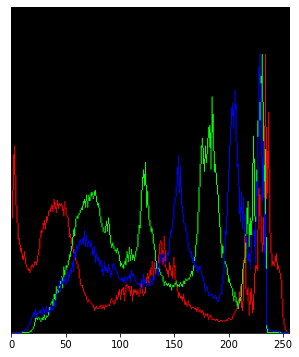

In [19]:
h = np.zeros((300,256,3))
bins = np.arange(256).reshape(256,1)
color = [ (255,0,0),(0,255,0),(0,0,255) ]
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # So that we view correctly with Matplotlib

for ch,col in enumerate(color):
    hist_item = cv.calcHist([rgb_img],[ch],None,[256],[0,255])
    cv.normalize(hist_item,hist_item,0,255,cv.NORM_MINMAX)
    hist = np.int32(np.around(hist_item))
    pts = np.column_stack((bins,hist))
    cv.polylines(h,[pts],False,col)
    
h=np.flipud(h)

plt.figure(figsize=(6,6)), plt.yticks([])
plt.imshow(h)

We can view this with the original image to make better sense of the histogram; we will use Matplotlib for this

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:xlabel='Primary color value of pixel'>,
 Text(0.5, 0, 'Primary color value of pixel'),
 ([], []))

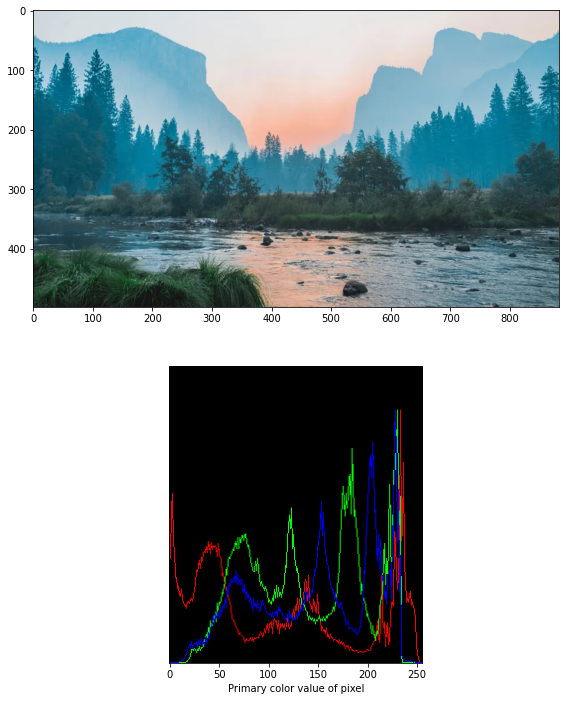

In [20]:
h = np.zeros((300,256,3))
bins = np.arange(256).reshape(256,1)
color = [ (255,0,0),(0,255,0),(0,0,255) ]
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # So that we view correctly with Matplotlib

for ch,col in enumerate(color):
    hist_item = cv.calcHist([rgb_img],[ch],None,[256],[0,255])
    cv.normalize(hist_item,hist_item,0,255,cv.NORM_MINMAX)
    hist = np.int32(np.around(hist_item))
    pts = np.column_stack((bins,hist))
    cv.polylines(h,[pts],False,col)
    
h=np.flipud(h)

plt.figure(figsize=(12,12))
plt.subplot(2,1,1), plt.imshow(rgb_img)
plt.subplot(2,1,2),plt.imshow(h),plt.xlabel('Primary color value of pixel'),plt.yticks([])

There appears to be quite a bit of red in the image, which isn't obvious from the image. It would be useful to know how many pixels have various amounts of red in them

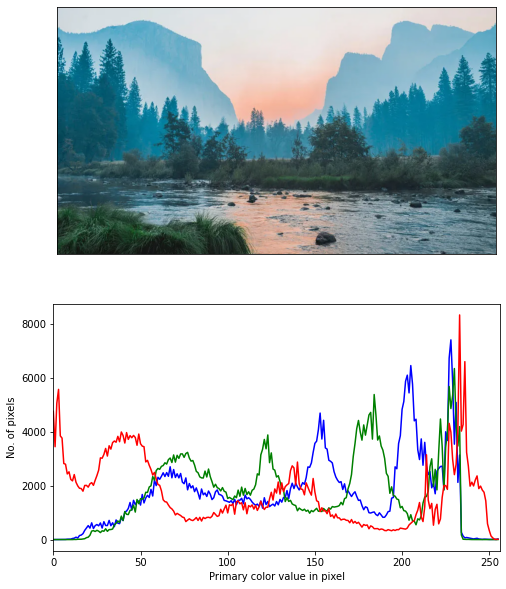

In [15]:
color = ('b','g','r')

plt.figure(figsize=(8,10))
plt.subplot(2,1,1), plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.xlabel('Primary color value in pixel'),plt.ylabel('No. of pixels')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

What is somewhat surprising is the number of pixels that have high red values, which isn't immediately obvious from the image although there is that red tinge to the background. Perhaps, the purple (dis)coloration of the image after I had removed all the green components from every pixel back in *3_BasicImageOps* was an indication of the amount of red in the image. I repeat the procedure below

(<matplotlib.image.AxesImage at 0x17c82832c08>, ([], []), ([], []))

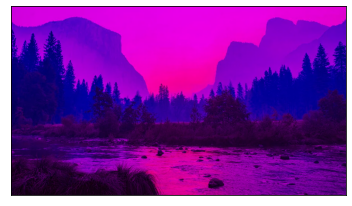

In [72]:
img_nogreen = cv.imread('bank_images/test3.png')
img_nogreen[:,:,1] = 0
rgb_img_nogreen = cv.cvtColor(img_nogreen, cv.COLOR_BGR2RGB)

plt.imshow(rgb_img_nogreen), plt.xticks([]), plt.yticks([])

**Histogram Calculation in Numpy**

Alternatively, instead of OpenCV, we could use Numpy; two options: <code>np.histogram()</code> and <code>np.bincount()</code>

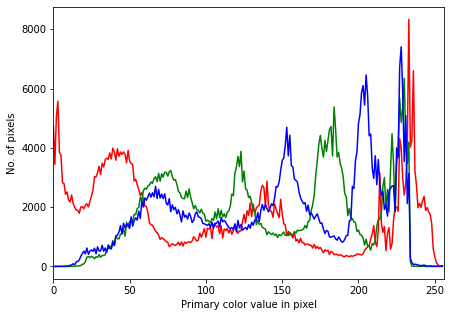

In [13]:
# np.histogram()

col = ("red", "green", "blue")  # Because Numpy is producing the histogram, we use RGB

plt.figure(figsize=(7,5))
plt.xlabel('Primary color value in pixel'),plt.ylabel('No. of pixels')
for ch,col in enumerate(col):
    hist,bins = np.histogram(rgb_img[:,:,ch],256,[0,256])
    plt.plot(bins[0:-1],hist,color = col)
    plt.xlim([0,256])

In [ ]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1), plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.xlabel('Primary color value in pixel'),plt.ylabel('No. of pixels')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

If however, we were dealing with a grayscale image, then instead of <code>img[:,:,ch]</code>, we could use <code>img.ravel()</code>. The code could go something like:

<pre>
    <strong><font color='green'>for</font></strong> i,col <font color='green'><strong>in</strong> enumerate</font>(color):
        hist,bins = np.histogram(img.ravel(),256,[0,256])
        plt.plot(hist,color = col)
        plt.xlim([0,256])
</pre>

For <code>np.bincount()</code> (which is much faster than <code>np.histogram()</code>), the codes use for <code>np.histogram()</code> should work (replacing <code>np.histogram()</code> with <code>np.bincount(img.</code>(required operation on img)<code>,minlength = 256)</code>. It should be said that OpenCV is much faster than Numpy in histogram production and so I will stick with the former.

**Application of Mask**

Used when you want to find the histogram of a certain region of the image

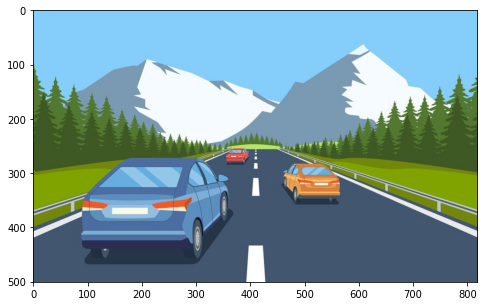

In [37]:
img = cv.imread('bank_images/test13.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(9,5))
plt.imshow(rgb_img)

I want to get a histogram of the blue car

In [41]:
# Create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[270:470, 85:365] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)

# Quick check that I've got the right area
cv.imshow('mask', mask)
cv.imshow('masked_img', masked_img)
cv.waitKey(0)
cv.destroyAllWindows()

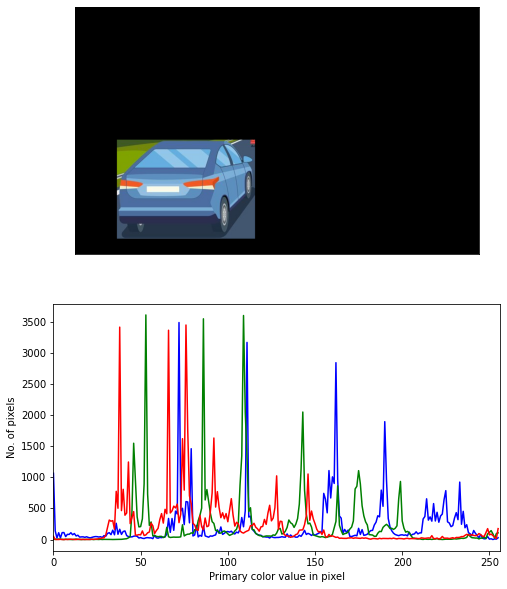

In [39]:
# Calculate histogram(s) and view on Matplotlib
color = ('b','g','r')

rgb_masked_img = cv.cvtColor(masked_img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,10))
plt.subplot(2,1,1), plt.imshow(rgb_masked_img), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.xlabel('Primary color value in pixel'),plt.ylabel('No. of pixels')
for i,col in enumerate(color):
    hist_mask = cv.calcHist([img],[i],mask,[256],[0,256])  # Note: 'mask' takes the place of 'None'
    plt.plot(hist_mask,color = col)
    plt.xlim([0,256])

Although the BGR/RGB system is 'easier' to describe in terms of physics, when it comes to identifying which object is responsible for which peak in the histogram, as you can see, it can be difficult (if not impossible). Despite isolating the blue car as much as possible, where I would expect to find peaks relating to the car, that is, the region with pixels with high blue values, I see only a few pixels have such high blue values, which does not fit with the wide area occupied by the car. Where I am seeing a lot of pixels with blue values, I am also seeing a similar number with green values. Yet, the perceived source of the green, the green grass, occupy a relatively small area of the isolated region, suggesting that the blue car might have significant green in it. The perception is not quite working well with the mathematics of the color mix.

A better option is to find a system that works better with perception; I will return to this later. Let me check that the color distribution I produced with Matplotlib is actually correct

In [46]:
# Just checking to see that the color distribution is correct
hat = np.zeros((300,256,3))
bins = np.arange(256).reshape(256,1)
color = [ (255,0,0),(0,255,0),(0,0,255) ]

for ch,col in enumerate(color):
    hist_item = cv.calcHist([img],[ch],mask,[256],[0,255])
    cv.normalize(hist_item,hist_item,0,255,cv.NORM_MINMAX)
    hist = np.int32(np.around(hist_item))
    pts = np.column_stack((bins,hist))
    cv.polylines(hat,[pts],False,col)

hat=np.flipud(hat)

cv.imshow('colorhist',hat)
cv.waitKey(0)
cv.destroyAllWindows()

**Histogram Equalization**

As shown in the illustration below (useful in face recognition)

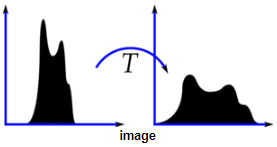

For the theory and code implementation, see:
<br>
https://en.wikipedia.org/wiki/Histogram_equalization
<br>
https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html

In [47]:
# In case I need to input equalization code (for training/practice purposes)


**2D Histograms**

Used for color, but unlike the color histograms done earlier, which consider just one feature of color, the BGR/RGB value, 2D color histograms, on the other hand, consider two features of color, such as hue and saturation.

We can still use <code>cv.calcHist()</code>, but the following adjustments are required

***channels*** = [0,1] because we need to process both H and S plane.
<br>
***bins*** = [180,256] 180 for H plane and 256 for S plane.
<br>
***range*** = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1cdd88c4108>)

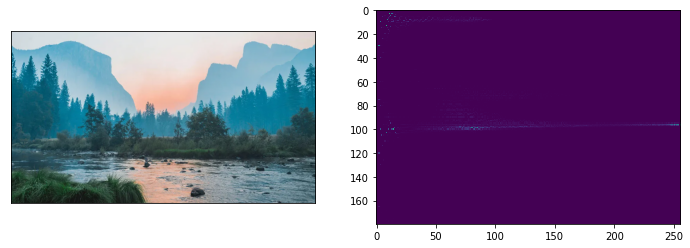

In [54]:
img = cv.imread('bank_images/test3.png')
#img = cv.imread('bank_images/test13.png')

hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,9))
plt.subplot(1,2,1), plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(hist,interpolation = 'nearest')

The graph above is not very informative; a more useful one requires more lines of code, as shown below

In [75]:
hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:,:,0] = h
hsv_map[:,:,1] = s
hsv_map[:,:,2] = 255
hsv_map = cv.cvtColor(hsv_map, cv.COLOR_HSV2BGR)


hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
dark = hsv[...,2] < 32
hsv[dark] = 0

hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
vis = hsv_map*hist[:,:,np.newaxis] / 255.0

# View on OpenCV
cv.imshow('hist', vis)
cv.waitKey(0)
cv.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:xlabel='Saturation', ylabel='Hue'>,
 Text(0.5, 0, 'Saturation'),
 Text(0, 0.5, 'Hue'))

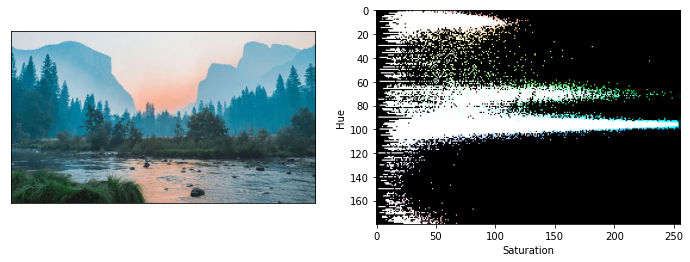

In [73]:
# View on Matplotlib
rgb_vis = cv.cvtColor(vis, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,11))
plt.subplot(1,2,1), plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(rgb_vis),plt.xlabel('Saturation'),plt.ylabel('Hue')

What is good about the above type of histogram is that it is much easier to relate the colors seen in the image with the color distribution in the histogram. As we saw earlier, such relationship is much harder to decipher with the BGR/RGB histograms. Remember that *hue* tells you the perceived color (so we don't have to deal with just three colors and try to decipher the secondary/tertiary colors they are making when combined) while *saturation* tells you the intensity of the perceived color. Notice that the color white can have a wide range of hues to cover the entire range (as can black; see p27 in the SD329 OU book), which is generally not the case for non-white and non-black colors.

Also see https://fossies.org/linux/opencv/samples/python/color_histogram.py

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:xlabel='Saturation', ylabel='Hue'>,
 Text(0.5, 0, 'Saturation'),
 Text(0, 0.5, 'Hue'))

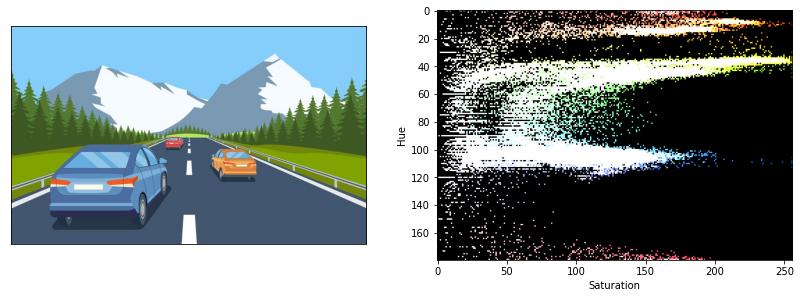

In [78]:
img = cv.imread('bank_images/test13.png')

hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:,:,0] = h
hsv_map[:,:,1] = s
hsv_map[:,:,2] = 255
hsv_map = cv.cvtColor(hsv_map, cv.COLOR_HSV2BGR)


hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
dark = hsv[...,2] < 32
hsv[dark] = 0

hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
vis = hsv_map*hist[:,:,np.newaxis] / 255.0

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rgb_vis = cv.cvtColor(vis, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,12))
plt.subplot(1,2,1), plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(rgb_vis),plt.xlabel('Saturation'),plt.ylabel('Hue')

I like the fact that on the histogram, I can distinguish the blue car from the 'blue' road and even the blue car's tail light from the red car! And how about the masked image?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:xlabel='Saturation', ylabel='Hue'>,
 Text(0.5, 0, 'Saturation'),
 Text(0, 0.5, 'Hue'))

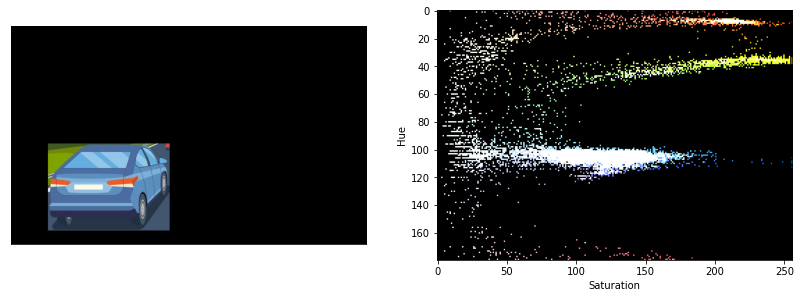

In [79]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[270:470, 85:365] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)

hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:,:,0] = h
hsv_map[:,:,1] = s
hsv_map[:,:,2] = 255
hsv_map = cv.cvtColor(hsv_map, cv.COLOR_HSV2BGR)


hsv = cv.cvtColor(masked_img,cv.COLOR_BGR2HSV)
dark = hsv[...,2] < 32
hsv[dark] = 0

hist = cv.calcHist( [hsv], [0, 1], mask, [180, 256], [0, 180, 0, 256] )
vis = hsv_map*hist[:,:,np.newaxis] / 255.0

# View on Matplotlib
rgb_masked_img = cv.cvtColor(masked_img, cv.COLOR_BGR2RGB)
rgb_vis = cv.cvtColor(vis, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14,12))
plt.subplot(1,2,1), plt.imshow(rgb_masked_img), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(rgb_vis),plt.xlabel('Saturation'),plt.ylabel('Hue')

So much easier to interpret than the RGB histogram done earlier! Notice, from the histogram, we can identify the bit of red car in the isolated extract, green grass, blue car, including its different sides and parts as well as its red tail lights, blue road; a fantastic illustration of image segmentation using color spaces!

<code>np.histogram2d()</code> can also be used; see https://docs.opencv.org/3.4/dd/d0d/tutorial_py_2d_histogram.html as a starting point


Back to image segmentation in general, we have looked at three ways of achieving this: contours, moments, and color spaces. One or more of these ways could be plugged into a fourth way, *backprojection*

**Histogram Backprojection**

This is a way of finding an object in an image. To do this, we produce a histogram of the object of interest and then produce a histogram of the test image containing the object of interest. We 'back-project' the histogram of our object over our histogram of the test image and calculate the probability of every pixel in the test image belonging to the object of interest.

We can back-project using either Numpy or OpenCV itself. The Numpy method is the more classical approach and requires the production of two histograms, one for the object and the other for the image and then back-projecting. The OpenCV method on the other hand only requires the production of one histogram, which is for the object. OpenCV then uses its inbuilt <code>cv.calBackProject()</code> function to back-project the color profile of the image with the histogram of the object. I use this method, but an example of a Numpy method can be found at https://docs.opencv.org/3.4/dc/df6/tutorial_py_histogram_backprojection.html

Let us try to detect the basket in an image we've looked at before

(<matplotlib.image.AxesImage at 0x186820156c8>, ([], []), ([], []))

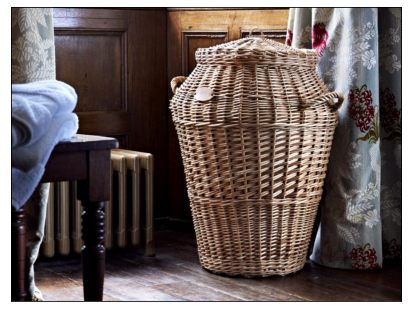

In [2]:
img = cv.imread('bank_images/test11.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])

And there's our basket! As I found out in *6A_ImageProcessing_p3_Supplementary*, using color spaces is tricky because of the significant differences in lighting across the entire basket. And we saw in *6A_ImageProcessing_p3i-Contours* just how complicated its contours are, as well as the fact that the basket does not have a single centroid. Hence, I will try back-projection

First, an image of *only* the basket

(<matplotlib.image.AxesImage at 0x186821b9a88>, ([], []), ([], []))

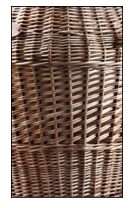

In [3]:
basket = cv.imread('bank_images/test11_basketextract.png')

# View on Matplotlib
rgb_basket = cv.cvtColor(basket, cv.COLOR_BGR2RGB)
plt.figure(figsize=(2,4))
plt.imshow(rgb_basket), plt.xticks([]), plt.yticks([])

In [4]:
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hsv_basket = cv.cvtColor(basket, cv.COLOR_BGR2HSV)

# Histogram ROI
basket_hist = cv.calcHist([hsv_basket], [0, 1], None, [180, 256], [0, 180, 0, 256])
mask = cv.calcBackProject([hsv_img], [0, 1], basket_hist, [0, 180, 0, 256], 1)

# Filtering remove noise
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
mask = cv.filter2D(mask, -1, kernel, mask)
ret,thresh = cv.threshold(mask, 100, 255, 0)

mask = cv.merge((thresh, thresh, thresh))
result = cv.bitwise_and(img, mask)

cv.imshow("Mask", mask)
cv.imshow("Result", result)
cv.waitKey(0)
cv.destroyAllWindows()

(<matplotlib.image.AxesImage at 0x18682dc9f48>, ([], []), ([], []))

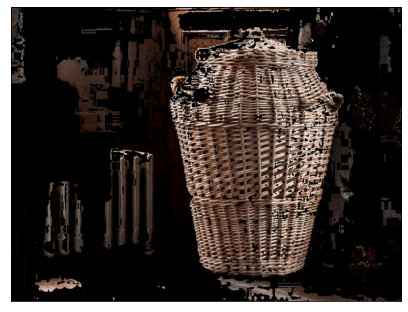

In [5]:
# View on Matplotlib
rgb_result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_result), plt.xticks([]), plt.yticks([])

Still not as good as I would have liked; in fact, argueably, it's result is worse than the color spaces method! However, histogram backprojection turns out to be very useful in tracking objects if making the background and everything else black isn't really important. I explore this in *6C_VideoAnalysis_p1*.

As for making the background black whilst extracting the object of interest, I'll explore other methods later on.

### Fourier Transform

**Basics**

This is an operation that converts a mathematical function into a form that describes frequencies in the original function. The mathematics behind the transformation can be very complex, which I won't go into here!

**Application to Images**

When applied to images, Fourier Transform enables us determine the frequency of the amplitude of the signal for the image. The amplitude of the image signal tends to change dramatically annd quickly at *edges* and *noises*—they are high-frequency content. Edges usually indicate discontinuity and are often detected by sudden change in brightness, in other words, discrimination between one object and another. Edge detection is a crucial part of both physiological and computer vision, but physiological beings like humans have an assortment of ways of detecting edges. On the other hand, with computer vision, in the image containing the basket, I have not been as successful in using OpenCV to detect it. Contours and moments (centroid) have not been practical. Color spaces have been the most successful but a lot of information has been lost in the detection process. Back-projection has been disappointing; let us revisit the previous back-projection attempt at detecting the basket, but this time include the binary image as well

(<AxesSubplot:>,
 ([], []),
 ([], []))

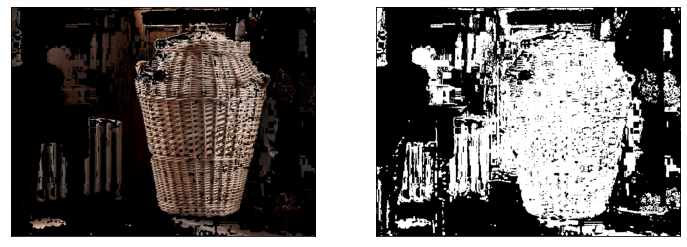

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1), plt.imshow(rgb_result), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(mask, cmap = 'gray'), plt.xticks([]), plt.yticks([])

We see that edge detection between the basket and part of the background is fairly poor, and we also see that much of the radiator is appearing almost as prominently as the basket. FT may provide us with a clue as to why this is the case.

**2D Discrete Fourier Transform (DFT)**

Quite simply, this converts a certain type of secondary FT of a function into 'discrete' components.

The secondary FT that is input to DFT is itself a periodic summation (discrete-time Fourier transform) of the original primary FT, but to get DTFT, the original function needs to be broken down into discrete parts. The diagram below illustrates the relationship between 'periodic' and 'discrete' when it comes to the inter-relationship between function and FT

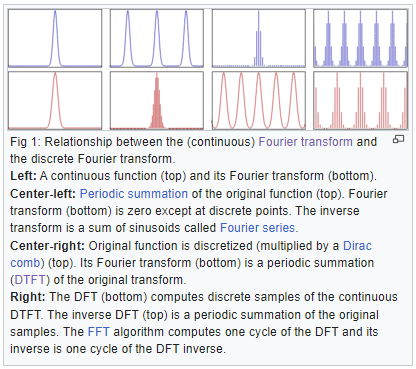

A great video introduction into this is:

https://www.youtube.com/watch?v=kOAjKrBhbCg&t=1144s

A fast algorithm called *Fast Fourier Transform (FFT)* is used for calculation of DFT. Details about these can be found in any image processing or signal processing textbooks.

For a sinusoidal signal, *x(t)=Asin(2πft)*, we can say *f* is the frequency of signal, and if its frequency domain is taken, we can see a spike at *f*. If signal is sampled to form a discrete signal, we get the same frequency domain, but is periodic in the range [−π,π] or [0,2π] (or [0,N] for N-point DFT). You can consider an image as a signal which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency representation of image.

Now we will see how to find the Fourier Transform.

**Fourier Transform in Numpy**

Numpy has an FFT package to do this. <code>np.fft.fft2()</code>, which provides us the frequency transform; it will be a complex array. Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.

Once you get the result on a graph, the zero frequency component (DC component—the largest of the components) will be at the top left corner. Now every pixel you go out in a specific direction tells you how many waves with a particular frequency are required to be added up together to describe the variation in that specific direction of the image. The frequency increases up to the middle in the specific diirection and then the frequencies start to fill back on themselves, subsequently decreasing in that specific direction until the frequency gets to minimum at the opposite end of that specific direction. The low-frequency areas are typically white and the high-frequency areas, black. This means that the graph produced, has a lot of black outside the periphery (the video visualises this). If you want to bring the DC to the center, you need to shift the result by N/2 in both the directions. This is simply done by the function, <code>np.fft.fftshift()</code> (this makes analysis easier).

The FFT plot, however, once centered, now leaves a lot of black outside the center! So, to 'fill up' the graph with the FFT output, we usually plot the logarithm of FFT, that is, <code>np.log(np.abs(np.fft.fftshift()))</code> (again, the video visualises this). It is also good practice to revise the numbering of the graph to <code>[-Nx/2, Nx/2, Ny/2, -Ny/2]</code>

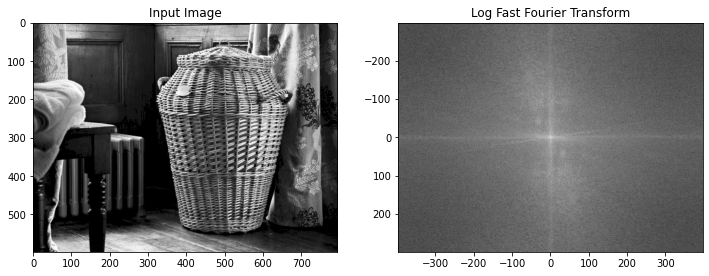

In [36]:
img = cv.imread('bank_images/test11.png', cv.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

img_aspect = img.shape[0]/img.shape[1]
Ny, Nx = img.shape
N = Nx * Ny

# View with Matplotlib
fig, (aL, aR) = plt.subplots(figsize=(12,6*img_aspect), ncols=2)

aL.imshow(img, cmap = 'gray', extent=[0, Nx, Ny, 0])
aL.title.set_text("Input Image")

aR.imshow(magnitude_spectrum, cmap = 'gray', extent=[-Nx/2, Nx/2, Ny/2, -Ny/2])
aR.title.set_text("Log Fast Fourier Transform")

The DFT/FFT graph has the same number of pixels as the input image, and each pixel is exactly the same size as in the original image, but while each pixel of the input graph tells you the BGR/RGB composition, each pixel of the FFT graph on the other hand is a *complex number* (that is, has *real* and *imaginary* parts), which tells you the amplitude and phase of a particular wave required, which when added together with the correct basis function, you can reconstruct the original image. Basis functions are easy to make because each index of the DFT tells you the frequencies in the x- and y-directions. In practice, we use FFT and subsequently inverse FFT to reconstruct the image rather than calculating each and every basis function as the former is much faster. 

Now when we look closely at the log FFT we have plotted, we see a prominent white horizontal line, which is probably representing areas in between horizontal boundaries we can see in the image such as the seat / table surface, wall indentations, and possibly parts of the basket. The prominent white vertical line probably represents the seat / table leg we see in the image, radiator sections and possibly parts of the basket. Blotches of white of variable sizes can also be seen throughout the graph, suggesting that image is seen as containing largely low-frequency content.

The video shows you how to use DFT and generate the basis functions and reconstruct the subsequent image. I will not be replicating that here; instead, I will be reconstructing our image using inverse FFT (<code>np.fft.ifft2()</code>), but in this case, exclude the prominent vertical line in the original FFT graph

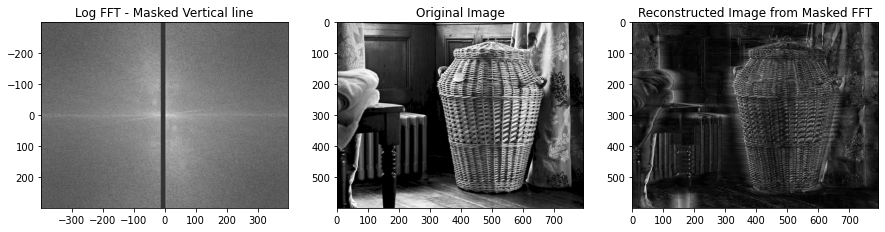

In [39]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
img_fft[:300, 385:400] = 255
img_fft[-300:,385:400] = 255

# View with Matplotlib
fig, (aL, aM, aR) = plt.subplots(figsize=(15,15*img_aspect), ncols=3)

aL.imshow(np.log(abs(img_fft)), cmap='gray', extent=[-Nx/2, Nx/2, Ny/2, -Ny/2])
aL.title.set_text('Log FFT - Masked Vertical line')

aM.imshow(img, cmap = 'gray', extent=[0, Nx, Ny, 0])
aM.title.set_text('Original Image')

aR.imshow(abs(np.fft.ifft2(img_fft)), cmap = 'gray', extent=[0, Nx, Ny, 0])
aR.title.set_text('Reconstructed Image from Masked FFT')

We see in our transformed image that much of the seat / table leg is missing! Also missing is much of the lighting and a lot of information is missing from the vertical boundaries of the wall indentations. Interestingly, the basket is quite distinguishable from the background, but much of the radiator is appearing almost as prominently as the basket.

Let us reconstruct our image again, but this time, exclude the prominent horizontal line in the original FFT graph rather than the vertical one

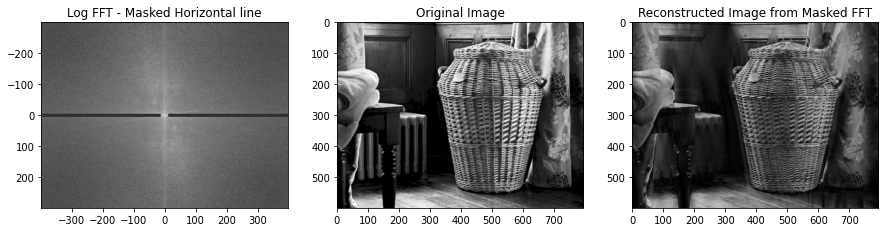

In [40]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
img_fft[295:305, :385] = 255
img_fft[295:305,-385:] = 255

# View with Matplotlib
fig, (aL, aM, aR) = plt.subplots(figsize=(15,15*img_aspect), ncols=3)

aL.imshow(np.log(abs(img_fft)), cmap='gray', extent=[-Nx/2, Nx/2, Ny/2, -Ny/2])
aL.title.set_text('Log FFT - Masked Horizontal line')

aM.imshow(img, cmap = 'gray', extent=[0, Nx, Ny, 0])
aM.title.set_text('Original Image')

aR.imshow(abs(np.fft.ifft2(img_fft)), cmap = 'gray', extent=[0, Nx, Ny, 0])
aR.title.set_text('Reconstructed Image from Masked FFT')

Here, we see that we have largely preserved lighting but the image is quite blurry. Also, interestingly, on the wall indentation left of the basket, the lower horizontal line is pretty much missing.

Let us exclude both the prominent horizontal and vertical white lines at the same time

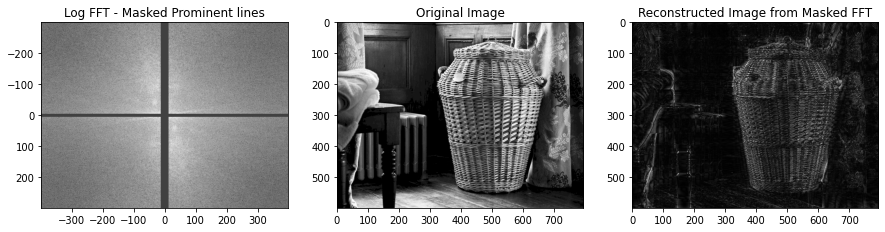

In [55]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
img_fft[295:305, :385] = 255
img_fft[295:305,-385:] = 255
img_fft[:300, 385:410] = 255
img_fft[-300:,385:410] = 255

# View with Matplotlib
fig, (aL, aM, aR) = plt.subplots(figsize=(15,15*img_aspect), ncols=3)

aL.imshow(np.log(abs(img_fft)), cmap='gray', extent=[-Nx/2, Nx/2, Ny/2, -Ny/2])
aL.title.set_text('Log FFT - Masked Prominent lines')

aM.imshow(img, cmap = 'gray', extent=[0, Nx, Ny, 0])
aM.title.set_text('Original Image')

aR.imshow(abs(np.fft.ifft2(img_fft)), cmap = 'gray', extent=[0, Nx, Ny, 0])
aR.title.set_text('Reconstructed Image from Masked FFT')

We're now starting to loose much of the detail on the rather (troublesome) radiator and indeed the curtain, and starting to detect the basket on its own. Let us extend the vertical and horizontal exclusion zones

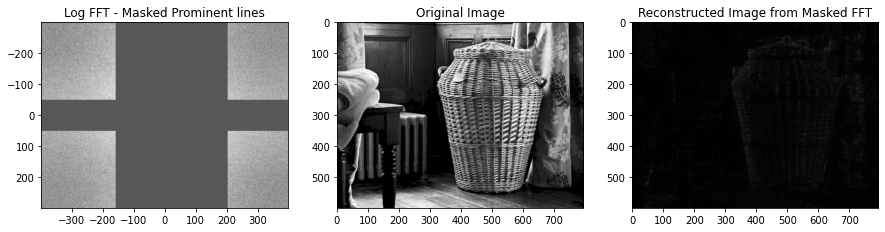

In [83]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
img_fft[250:350, :385] = 255
img_fft[250:350,-385:] = 255
img_fft[:300, 240:600] = 255
img_fft[-300:,240:600] = 255

# View with Matplotlib
fig, (aL, aM, aR) = plt.subplots(figsize=(15,15*img_aspect), ncols=3)

aL.imshow(np.log(abs(img_fft)), cmap='gray', extent=[-Nx/2, Nx/2, Ny/2, -Ny/2])
aL.title.set_text('Log FFT - Masked Prominent lines')

aM.imshow(img, cmap = 'gray', extent=[0, Nx, Ny, 0])
aM.title.set_text('Original Image')

aR.imshow(abs(np.fft.ifft2(img_fft)), cmap = 'gray', extent=[0, Nx, Ny, 0])
aR.title.set_text('Reconstructed Image from Masked FFT')

Most of the information is now missing although we can just about make out the basket, but it is now difficult to see. Despite losing so much information, the signal for the right side of the basket is still 'entangled' with the curtain. A more careful exclusion of certain zones of the FFT graph in the reconstruction process may improve things...

Rather than blocking the main vertical and horizontal line, a rectangular window of a certain size could be put in the middle of the graph. In the example below, a 60x60 window is used. Then apply the inverse shift using <code>np.fft.ifftshift()</code> so that DC component again come at the top-left corner. Then find inverse FFT using <code>np.ifft2()</code> function. The result, again, will be a complex number. You can take its absolute value.

(Text(0.5, 1.0, 'Result in JET color'), ([], []), ([], []))

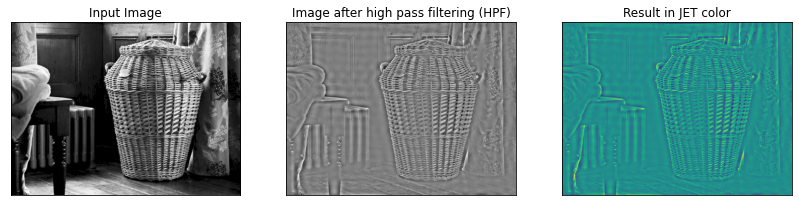

In [85]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-20:crow+21, ccol-20:ccol+21] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

# View in Matplotlib
plt.figure(figsize=(14,9))
plt.subplot(1,3,1),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after high pass filtering (HPF)'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img_back)
plt.title('Result in JET color'), plt.xticks([]), plt.yticks([])

It doesn't help!

**Fourier Transform in OpenCV**

Can be done using <code>cv.dft()</code> and <code>cv.idft()</code>. They are faster to use than the Numpy counterparts, but are less user-friendly.

See https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

RGB histograms are not done yet though...

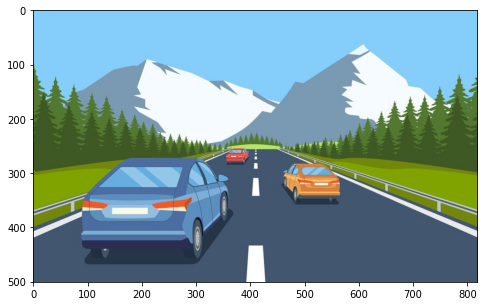

In [21]:
img = cv.imread('bank_images/test13.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(9,5))
plt.imshow(rgb_img)

Text(0, 0.5, 'Number of Pixels')

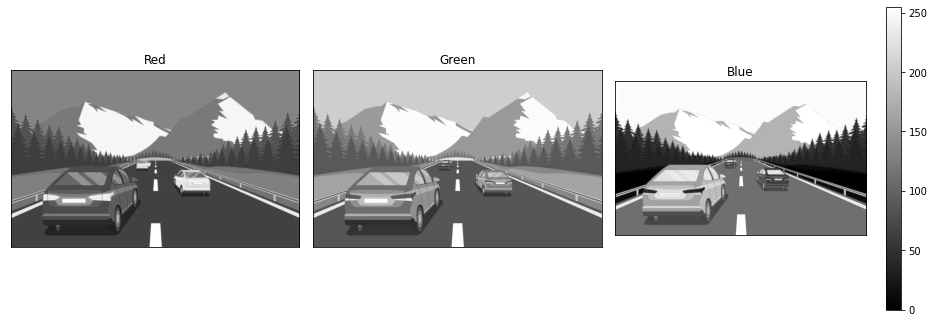

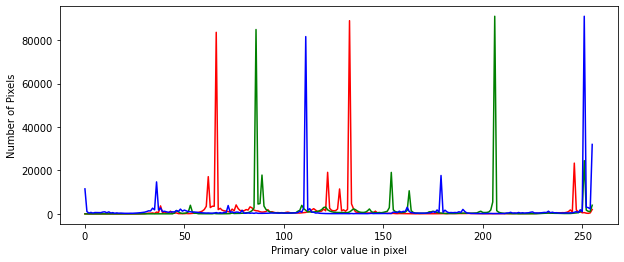

In [26]:
im = np.array(Image.open('bank_images/test13.png'))
channelNames=['Red','Green','Blue']

fig, axes = plt.subplots(1,3,figsize=(14,4))
for channel, ax in enumerate(axes):
    imshow=ax.imshow(im.T[channel].T, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(channelNames[channel])

fig.colorbar(imshow,fraction=0.06, pad=0.07, shrink=1.5)
fig.tight_layout()
fig.subplots_adjust(right=0.9)

fig, ax = plt.subplots(1, figsize=(10,4))
for channel in range(3):
    cts = np.bincount(im.T[channel].flatten())
    bins=np.arange(0,256,1)
    ax.plot(bins, cts, c=channelNames[channel])
ax.set_xlabel('Primary color value in pixel')
ax.set_ylabel('Number of Pixels')

As you can see, they can still tell us a lot!